## Importing required packages

In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt


import pandas as pd
import statsmodels.api as sm
import matplotlib
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'G'

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,7


C:\Users\Saranga\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  


In [12]:
warnings.filterwarnings("ignore")

## Loading dataset

In [4]:
df = pd.read_csv('monthly_data1.csv',parse_dates=['Date'], index_col='Date')
df=df[:360]

In [14]:
df.shape

(360, 1)

In [21]:
df.head()

,No
Date,
1990-01-01,32.0
1990-01-02,51.0
1990-01-03,40.0
1990-01-04,26.0
1990-01-05,33.0


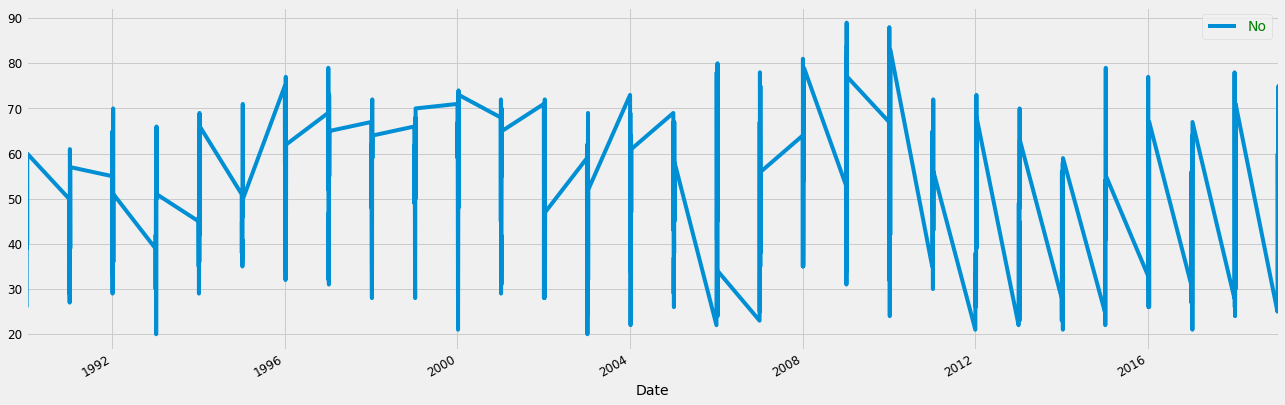

In [15]:
df.plot(figsize=(20, 7))
plt.show()

## Dataset decomposed into its components- Trend, Seasonality, Residue

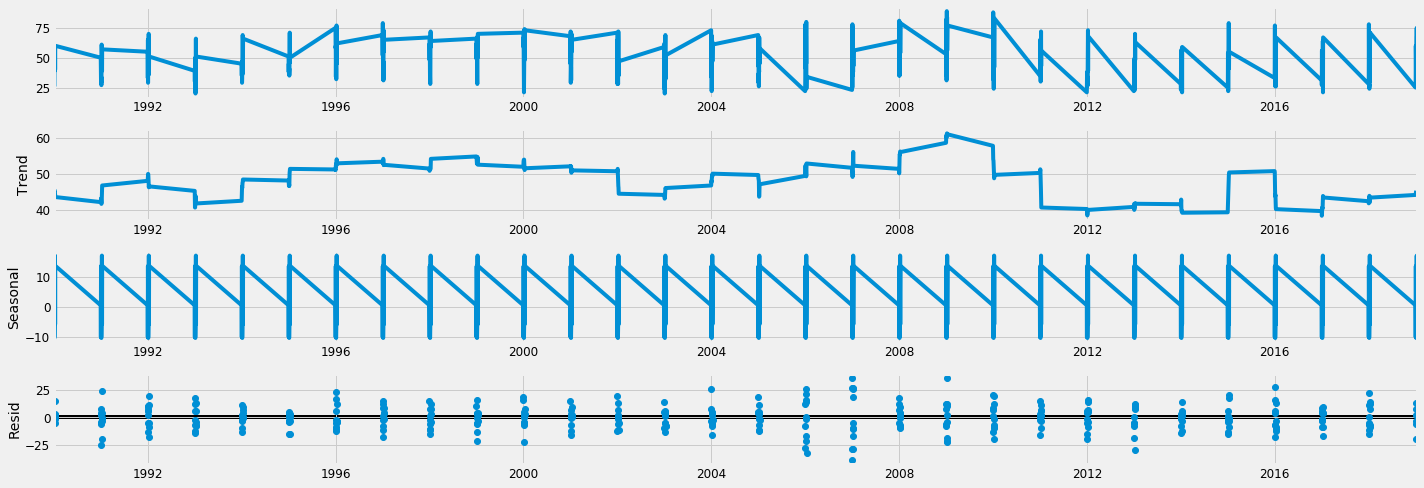

In [16]:

decomposition = sm.tsa.seasonal_decompose(df, model='additive',freq=12)
fig = decomposition.plot()
plt.show()

## Seasonal component present, so SARIMA model used

In [26]:
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]


In [24]:

mod = sm.tsa.statespace.SARIMAX(df,order=pdq[0],seasonal_order=seasonal_pdq[0],enforce_stationarity=False,enforce_invertibility=False)
results=mod.fit()
min_aic=results.aic
print(min_aic)


3838.103209156155


### For loop choosing optimal hyperparameters (p,d,q),(P,D,Q) by finding minimum AIC score

In [9]:

mod = sm.tsa.statespace.SARIMAX(df,order=pdq[0],seasonal_order=seasonal_pdq[0],enforce_stationarity=False,enforce_invertibility=False)
results=mod.fit()
min_aic=results.aic

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            if results.aic<min_aic:
                min_aic=results.aic
                min_param=param
                min_seasonal_param=param_seasonal
                
                            
            
            print('ARIMA{}x{} - AIC:{}'.format(param,param_seasonal,results.aic))
        except: 
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:3838.103209156155
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:3404.347510254634
ARIMA(0, 0, 0)x(0, 0, 2, 12) - AIC:3135.953709381209
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:2866.2323910458917
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:2670.33776802349
ARIMA(0, 0, 0)x(0, 1, 2, 12) - AIC:2570.4220920160697
ARIMA(0, 0, 0)x(0, 2, 0, 12) - AIC:3116.05497935879
ARIMA(0, 0, 0)x(0, 2, 1, 12) - AIC:2711.7394857492786
ARIMA(0, 0, 0)x(0, 2, 2, 12) - AIC:2530.009233918501
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:2869.7389066099895
ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:2766.597283243819
ARIMA(0, 0, 0)x(1, 0, 2, 12) - AIC:2669.654610542068
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:2726.9437174848763
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:2670.557584073038
ARIMA(0, 0, 0)x(1, 1, 2, 12) - AIC:2572.367711855392
ARIMA(0, 0, 0)x(1, 2, 0, 12) - AIC:2860.598890054216
ARIMA(0, 0, 0)x(1, 2, 1, 12) - AIC:2672.384470337486
ARIMA(0, 0, 0)x(1, 2, 2, 12) - AIC:2531.9478632448127
ARIMA(0, 0, 0)x(2, 0, 0, 12) - AIC:2726.51

ARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:2671.206417223536
ARIMA(0, 1, 2)x(2, 0, 2, 12) - AIC:2642.6430165973616
ARIMA(0, 1, 2)x(2, 1, 0, 12) - AIC:2613.3102098058725
ARIMA(0, 1, 2)x(2, 1, 1, 12) - AIC:2570.874210968209
ARIMA(0, 1, 2)x(2, 1, 2, 12) - AIC:2548.9956009478033
ARIMA(0, 1, 2)x(2, 2, 0, 12) - AIC:2688.799967722606
ARIMA(0, 1, 2)x(2, 2, 1, 12) - AIC:2568.2447432272065
ARIMA(0, 1, 2)x(2, 2, 2, 12) - AIC:2507.584529965261
ARIMA(0, 2, 0)x(0, 0, 0, 12) - AIC:3603.7636082880426
ARIMA(0, 2, 0)x(0, 0, 1, 12) - AIC:3426.3868741960587
ARIMA(0, 2, 0)x(0, 0, 2, 12) - AIC:3282.8093419703723
ARIMA(0, 2, 0)x(0, 1, 0, 12) - AIC:3470.2775831809367
ARIMA(0, 2, 0)x(0, 1, 1, 12) - AIC:3199.141001549043
ARIMA(0, 2, 0)x(0, 1, 2, 12) - AIC:3091.0071857730272
ARIMA(0, 2, 0)x(0, 2, 0, 12) - AIC:3708.2225975278907
ARIMA(0, 2, 0)x(0, 2, 1, 12) - AIC:3275.536424130507
ARIMA(0, 2, 0)x(0, 2, 2, 12) - AIC:3023.9454397770423
ARIMA(0, 2, 0)x(1, 0, 0, 12) - AIC:3393.4276142069275
ARIMA(0, 2, 0)x(1, 0, 1, 12) - AIC

ARIMA(1, 0, 2)x(1, 0, 2, 12) - AIC:2643.811059604635
ARIMA(1, 0, 2)x(1, 1, 0, 12) - AIC:2711.9889607746436
ARIMA(1, 0, 2)x(1, 1, 1, 12) - AIC:2641.708927970533
ARIMA(1, 0, 2)x(1, 1, 2, 12) - AIC:2550.3807274119067
ARIMA(1, 0, 2)x(1, 2, 0, 12) - AIC:2850.1579193732764
ARIMA(1, 0, 2)x(1, 2, 1, 12) - AIC:2647.1129748424314
ARIMA(1, 0, 2)x(1, 2, 2, 12) - AIC:2509.244227374128
ARIMA(1, 0, 2)x(2, 0, 0, 12) - AIC:2693.00688363221
ARIMA(1, 0, 2)x(2, 0, 1, 12) - AIC:2665.210961953115
ARIMA(1, 0, 2)x(2, 0, 2, 12) - AIC:2642.7057488009123
ARIMA(1, 0, 2)x(2, 1, 0, 12) - AIC:2598.6381180559756
ARIMA(1, 0, 2)x(2, 1, 1, 12) - AIC:2565.727531904483
ARIMA(1, 0, 2)x(2, 1, 2, 12) - AIC:2551.528786417511
ARIMA(1, 0, 2)x(2, 2, 0, 12) - AIC:2678.5599115505142
ARIMA(1, 0, 2)x(2, 2, 1, 12) - AIC:2551.983774600041
ARIMA(1, 0, 2)x(2, 2, 2, 12) - AIC:2513.008640903501
ARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:3124.10924772953
ARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:2942.579179266061
ARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:2825.0

ARIMA(1, 2, 2)x(0, 1, 0, 12) - AIC:2858.0382121604353
ARIMA(1, 2, 2)x(0, 1, 1, 12) - AIC:2641.2572917994075
ARIMA(1, 2, 2)x(0, 1, 2, 12) - AIC:2550.9986394456905
ARIMA(1, 2, 2)x(0, 2, 0, 12) - AIC:3102.025545266552
ARIMA(1, 2, 2)x(0, 2, 1, 12) - AIC:2704.2203101934474
ARIMA(1, 2, 2)x(0, 2, 2, 12) - AIC:2508.0253091277355
ARIMA(1, 2, 2)x(1, 0, 0, 12) - AIC:2803.1932134491576
ARIMA(1, 2, 2)x(1, 0, 1, 12) - AIC:2746.240577806703
ARIMA(1, 2, 2)x(1, 0, 2, 12) - AIC:2707.336915870773
ARIMA(1, 2, 2)x(1, 1, 0, 12) - AIC:2724.2199607730695
ARIMA(1, 2, 2)x(1, 1, 1, 12) - AIC:2646.422846359527
ARIMA(1, 2, 2)x(1, 1, 2, 12) - AIC:2549.066721150311
ARIMA(1, 2, 2)x(1, 2, 0, 12) - AIC:2858.571786630453
ARIMA(1, 2, 2)x(1, 2, 1, 12) - AIC:2664.701144854057
ARIMA(1, 2, 2)x(1, 2, 2, 12) - AIC:2587.978577670987
ARIMA(1, 2, 2)x(2, 0, 0, 12) - AIC:2689.5688867644903
ARIMA(1, 2, 2)x(2, 0, 1, 12) - AIC:2671.873531036529
ARIMA(1, 2, 2)x(2, 0, 2, 12) - AIC:2716.0975262187126
ARIMA(1, 2, 2)x(2, 1, 0, 12) - AIC:26

ARIMA(2, 1, 1)x(2, 1, 1, 12) - AIC:2555.3229582512677
ARIMA(2, 1, 1)x(2, 1, 2, 12) - AIC:2554.8361088507345
ARIMA(2, 1, 1)x(2, 2, 0, 12) - AIC:2666.3752583616124
ARIMA(2, 1, 1)x(2, 2, 1, 12) - AIC:2548.36210377453
ARIMA(2, 1, 1)x(2, 2, 2, 12) - AIC:2512.764166418506
ARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:3005.9012653972195
ARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:2829.567745452454
ARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:2705.3271495396
ARIMA(2, 1, 2)x(0, 1, 0, 12) - AIC:2852.4123409994827
ARIMA(2, 1, 2)x(0, 1, 1, 12) - AIC:2632.020251078044
ARIMA(2, 1, 2)x(0, 1, 2, 12) - AIC:2542.8617945682417
ARIMA(2, 1, 2)x(0, 2, 0, 12) - AIC:3090.811746743234
ARIMA(2, 1, 2)x(0, 2, 1, 12) - AIC:2693.282930558251
ARIMA(2, 1, 2)x(0, 2, 2, 12) - AIC:2525.495266930567
ARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:2784.9657846972877
ARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:2734.165483402655
ARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:2642.1234769262555
ARIMA(2, 1, 2)x(1, 1, 0, 12) - AIC:2702.00530846925
ARIMA(2, 1, 2)x(1, 1, 1, 12) - AIC:2633.99

In [29]:
print(min_aic,min_param,min_seasonal_param) #m is 12 (yearly)

2503.261006328844 (0, 1, 2) (0, 2, 2, 12)


## Fitting dataset with SARIMA model 

In [30]:
mod = sm.tsa.statespace.SARIMAX(df,
                                order=min_param,
                                seasonal_order=min_seasonal_param,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8839      0.038    -23.562      0.000      -0.957      -0.810
ma.L2         -0.0375      0.039     -0.952      0.341      -0.115       0.040
ma.S.L12      -2.2809    156.338     -0.015      0.988    -308.697     304.135
ma.S.L24       1.2810    200.297      0.006      0.995    -391.294     393.856
sigma2        97.9588   1.53e+04      0.006      0.995   -2.99e+04    3.01e+04


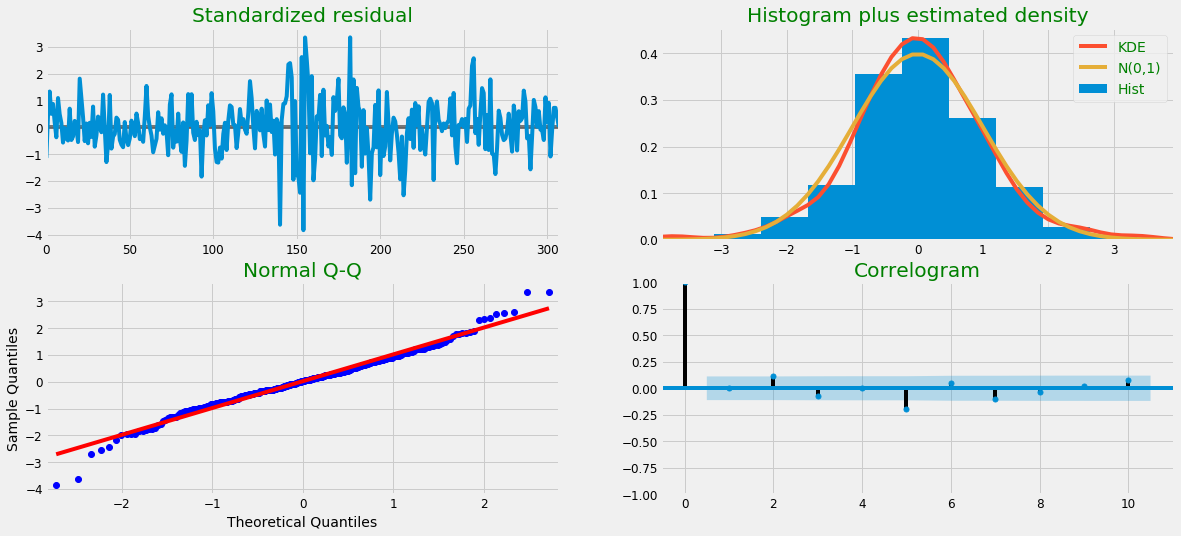

In [31]:
results.plot_diagnostics(figsize=(18, 8))
plt.show()

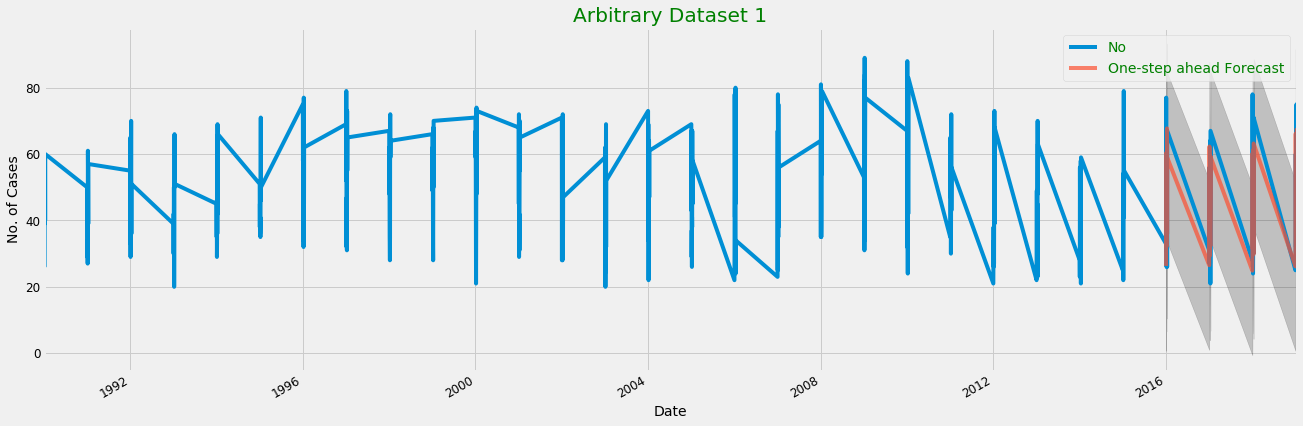

In [36]:
rcParams['figure.figsize']=20,7

pred = results.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = df['1990':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('No. of Cases')
plt.legend()
plt.title('Arbitrary Dataset 1')
plt.savefig('monthly1_modelfit.png')
plt.show()


pred_uc = results.get_forecast(steps=24)
pred_ci = pred_uc.conf_int()
ax = df.plot(label='observed', figsize=(14, 4))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

In [32]:
y_forecasted = pred.predicted_mean
y_forecasted.head(100)

Date
2016-01-01    26.296996
2016-01-02    26.946324
2016-01-03    60.354126
2016-01-04    41.646295
2016-01-05    32.081990
2016-01-06    37.056463
2016-01-07    40.709811
2016-01-08    47.818859
2016-01-09    56.270248
2016-01-10    67.733117
2016-01-11    35.985064
2016-01-12    58.924672
2017-01-01    26.516275
2017-01-02    30.680433
2017-01-03    62.268965
2017-01-04    34.467569
2017-01-05    29.728762
2017-01-06    29.410688
2017-01-07    44.624889
2017-01-08    38.841076
2017-01-09    47.445065
2017-01-10    59.503585
2017-01-11    32.264530
2017-01-12    59.225322
2018-01-01    24.890227
2018-01-02    27.612015
2018-01-03    60.233499
2018-01-04    34.524651
2018-01-05    31.414436
2018-01-06    32.165635
2018-01-07    44.401053
2018-01-08    34.167063
2018-01-09    49.755050
2018-01-10    61.255081
2018-01-11    29.787083
2018-01-12    63.186123
2019-01-01    26.179104
2019-01-02    29.537408
2019-01-03    66.176797
2019-01-04    36.514203
2019-01-05    29.540961
2019-01-06 

In [23]:
pred_ci.head(24)

,lower No,upper No
Date,,
2016-01-01,0.726302,51.867691
2016-01-02,1.375879,52.516768
2016-01-03,34.808643,85.899610
2016-01-04,16.104021,67.188569
2016-01-05,6.541659,57.622321
2016-01-06,11.517817,62.595110
2016-01-07,15.172602,66.247021
2016-01-08,22.282876,73.354842
2016-01-09,30.735311,81.805184


In [63]:
pred_uc = results.get_forecast(steps=12) #for (next 12 months) 1 year prediction
pred_ci = pred_uc.conf_int()


## Prediction for next year (dataset was upto 2019, so predicting number of cases for 2020)

In [64]:
forecast = pred_uc.predicted_mean
forecast=forecast.to_frame()

forecast=forecast.rename(columns = {0:'No of Cases'})
forecast.head(5)

,No of Cases
360,26.212342
361,30.574193
362,67.106934
363,42.898365
364,30.716820


In [65]:
forecast=forecast['No of Cases'].apply(np.ceil) #ceiling function applied to float data
forecast=forecast.to_frame()


In [66]:
forecast.head(12)

,No of Cases
360,27.0
361,31.0
362,68.0
363,43.0
364,31.0
365,36.0
366,38.0
367,36.0
368,59.0
369,69.0


In [67]:
forecast.to_csv("2020 Predictions for Dataset 1.csv")